In [2]:
! cdo -h

usage : cdo  [Options]  Operator1  [-Operator2  [-OperatorN]]

  Options:
    -a             Generate an absolute time axis
    -b <nbits>     Set the number of bits for the output precision
                   (I8/I16/I32/F32/F64 for nc/nc2/nc4/nc4c; F32/F64 for grb2/srv/ext/ieg; P1 - P24 for grb/grb2)
                   Add L or B to set the byteorder to Little or Big endian
    -f, --format <format>
                   Format of the output file. (grb/grb2/nc/nc2/nc4/nc4c/srv/ext/ieg)
    -g <grid>      Set default grid name or file. Available grids: 
                   n<N>, t<RES>, tl<RES>, global_<DXY>, r<NX>x<NY>, g<NX>x<NY>, gme<NI>, lon=<LON>/lat=<LAT>
    -h, --help     Help information for the operators
    --history      Do not append to NetCDF "history" global attribute
    --netcdf_hdr_pad, --hdr_pad, --header_pad <nbr>
                   Pad NetCDF output header with nbr bytes
    -k <chunktype> NetCDF4 chunk type: auto, grid or lines
    -L             Lock IO (sequential 

In [3]:
! cdo --operators

abs              Absolute value
acos             Arc cosine
add              Add two fields
addc             Add a constant
adipot           In-situ temperature to potential temperature
adisit           Potential temperature to in-situ temperature
aexpr            Evaluate expressions and append results
aexprf           Evaluate expression script and append results
after            ECHAM standard post processor
afterburner      --> after
anomaly          --> ymonsub
ap2pl            Vertical interpolation
ap2pl_lp         
ap2plx           
ap2plx_lp        
asin             Arc sine
atan             Arc tangent
atan2            Arc tangent of two fields
bandpass         Bandpass filtering
boxavg           
cat              Concatenate datasets
cdiread          
cdiwrite         
chcode           Change code number
chlevel          Change level
chlevelc         Change level of one code
chlevelv         Change level of one variable
chltype          
chname           Change variable name

In [4]:
! cdo -h yseasvar

NAME
    yseasmin, yseasmax, yseassum, yseasmean, yseasavg, yseasstd, yseasstd1, 
    yseasvar, yseasvar1 - Multi-year seasonal statistical values

SYNOPSIS
    <operator>  ifile ofile

DESCRIPTION
    This module computes statistical values of each season.
    Depending on the chosen operator the minimum, maximum, sum, average, variance
    or standard deviation of each season in ifile is written to ofile.
    The date information in an output field is the date of the last contributing input field.

OPERATORS
    yseasmin   Multi-year seasonal minimum
               o(1,x) = min{i(t,x), month(i(t)) = 12, 01, 02}
               o(2,x) = min{i(t,x), month(i(t)) = 03, 04, 05}
               o(3,x) = min{i(t,x), month(i(t)) = 06, 07, 08}
               o(4,x) = min{i(t,x), month(i(t)) = 09, 10, 11}
    yseasmax   Multi-year seasonal maximum
               o(1,x) = max{i(t,x), month(i(t)) = 12, 01, 02}
               o(2,x) = max{i(t,x), month(i(t)) = 03, 04, 05}
               o(3,x) = ma

In [13]:
ls  /g/data1/ua6/authoritative/IPCC/CMIP5/CSIRO-BOM/ACCESS1-3/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc

/g/data1/ua6/authoritative/IPCC/CMIP5/CSIRO-BOM/ACCESS1-3/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc@


In [14]:
! cdo yseasvar /g/data1/ua6/authoritative/IPCC/CMIP5/CSIRO-BOM/ACCESS1-3/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc temp.nc

Warning (cdfScanVarAttributes) : NetCDF: Variable not found - areacella
cdo yseasvar: Processed 31737600 values from 1 variable over 1140 timesteps ( 0.28s )


In [15]:
ls

01-siphon.ipynb  02-xarray-basics.ipynb   03-bigdata.ipynb  Untitled.ipynb
02-nino34.ipynb  02-xarray-slicing.ipynb  temp.nc


In [16]:
! ncdump -h temp.nc

netcdf temp {
dimensions:
	lon = 192 ;
	bnds = 2 ;
	lat = 145 ;
	time = UNLIMITED ; // (4 currently)
variables:
	double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
		lon:bounds = "lon_bnds" ;
	double lon_bnds(lon, bnds) ;
	double lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
		lat:bounds = "lat_bnds" ;
	double lat_bnds(lat, bnds) ;
	double height ;
		height:standard_name = "height" ;
		height:long_name = "height" ;
		height:units = "m" ;
		height:positive = "up" ;
		height:axis = "Z" ;
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 1-1-1 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
		time:axis = "T" ;
	float tas(time, lat, lon) ;
		tas:standard_name = "air_temperature" ;
		tas:long_name = "Near-Surface Air Temperature" ;
		tas:units = "K" ;
		tas:coordi

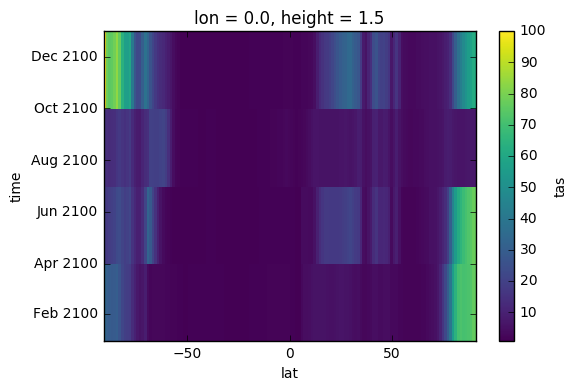

In [23]:
%matplotlib inline
import xarray
d = xarray.open_dataset('temp.nc')
d['tas'].sel(lon=0, method='nearest').plot()

In [27]:
! ncks -v lat temp.nc temp1.nc

In [28]:
! ncdump -h temp1.nc

netcdf temp1 {
dimensions:
	lat = 145 ;
	bnds = 2 ;
variables:
	double lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
		lat:bounds = "lat_bnds" ;
	double lat_bnds(lat, bnds) ;

// global attributes:
		:CDI = "Climate Data Interface version 1.7.1 (http://mpimet.mpg.de/cdi)" ;
		:Conventions = "CF-1.4" ;
		:history = "Fri Nov 11 10:04:01 2016: ncks -O -v lat temp.nc temp1.nc\n",
			"Thu Nov 10 17:05:37 2016: cdo yseasvar /g/data1/ua6/authoritative/IPCC/CMIP5/CSIRO-BOM/ACCESS1-3/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc temp.nc\n",
			"CMIP5 compliant file produced from raw ACCESS model output using the ACCESS Post-Processor and CMOR2. 2012-03-14T03:46:56Z CMOR rewrote data to comply with CF standards and CMIP5 requirements. Fri Apr 13 12:32:01 2012: corrected model_id from ACCESS1-3 to ACCESS1.3 Fri Apr 13 14:07:49 2012: forcing attribute modified to correct valu